In [1]:
# import of the different libraries used during the notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Gradient descent principles

## Gradient descent methods 

### A simple quadratic function

First of all we define the gradient of the function that is going to be studied:

In [2]:
def grad_fun1(point):
    return 2*point

Given an initial point, our aim is to try and find the minimum by performing a descent guided by the gradient calculated after each iteration:

$$x^{k+1}= x^k - \alpha^k \nabla f(x^k)$$

Therefore, what we do is define a function named *grad_desc* that takes the gradient of a function and performs a gradient descent given an initial point, a constant alpha and a number of iterations:

In [3]:
def grad_desc(grad, x0, max_iter = 100, alpha = 0.1):
    x = []
    count = 0
    xk = x0
    for i in range(0,max_iter):
        x.append(xk.tolist())
        if np.linalg.norm(grad(xk)) < 10**-5 and count==0:
            count = count + 1
            print ("For x0=", x0.tolist(), "and step=", alpha, 
                   ", convergence reached after", i, "iterations.")
            print ("xconv=", xk.tolist())
        if i==max_iter:
            if count == 1:
                print("xfinal=", xk.tolist())
            else:
                print("Convergence not reached for x0=", x0.tolist(), 
                  "and step=", alpha,", after", i, "iterations.")
        xk = xk - alpha*grad(xk)   
    return x

Now, let's see how different starting points eventually find the minimum and let's draw them. Our parameters are: 

Number of iterations: 100.\
Steps $\alpha^k$: 0.1, 0.9, 1, 1.1 and 2. \
Starting points $x^0$: (0, 50), (50, -50) and (-75, 0).
 

For x0= [0, 50] and step= 0.1 , convergence reached after 73 iterations.
xconv= [0.0, 4.21249166674229e-06]
For x0= [50, -50] and step= 0.1 , convergence reached after 74 iterations.
xconv= [3.3699933333938316e-06, -3.3699933333938316e-06]
For x0= [-75, 0] and step= 0.1 , convergence reached after 75 iterations.
xconv= [-4.0439920000725996e-06, 0.0]
For x0= [0, 50] and step= 0.9 , convergence reached after 73 iterations.
xconv= [0.0, -4.212491666742309e-06]
For x0= [50, -50] and step= 0.9 , convergence reached after 74 iterations.
xconv= [3.3699933333938476e-06, -3.3699933333938476e-06]
For x0= [-75, 0] and step= 0.9 , convergence reached after 75 iterations.
xconv= [4.043992000072622e-06, 0.0]


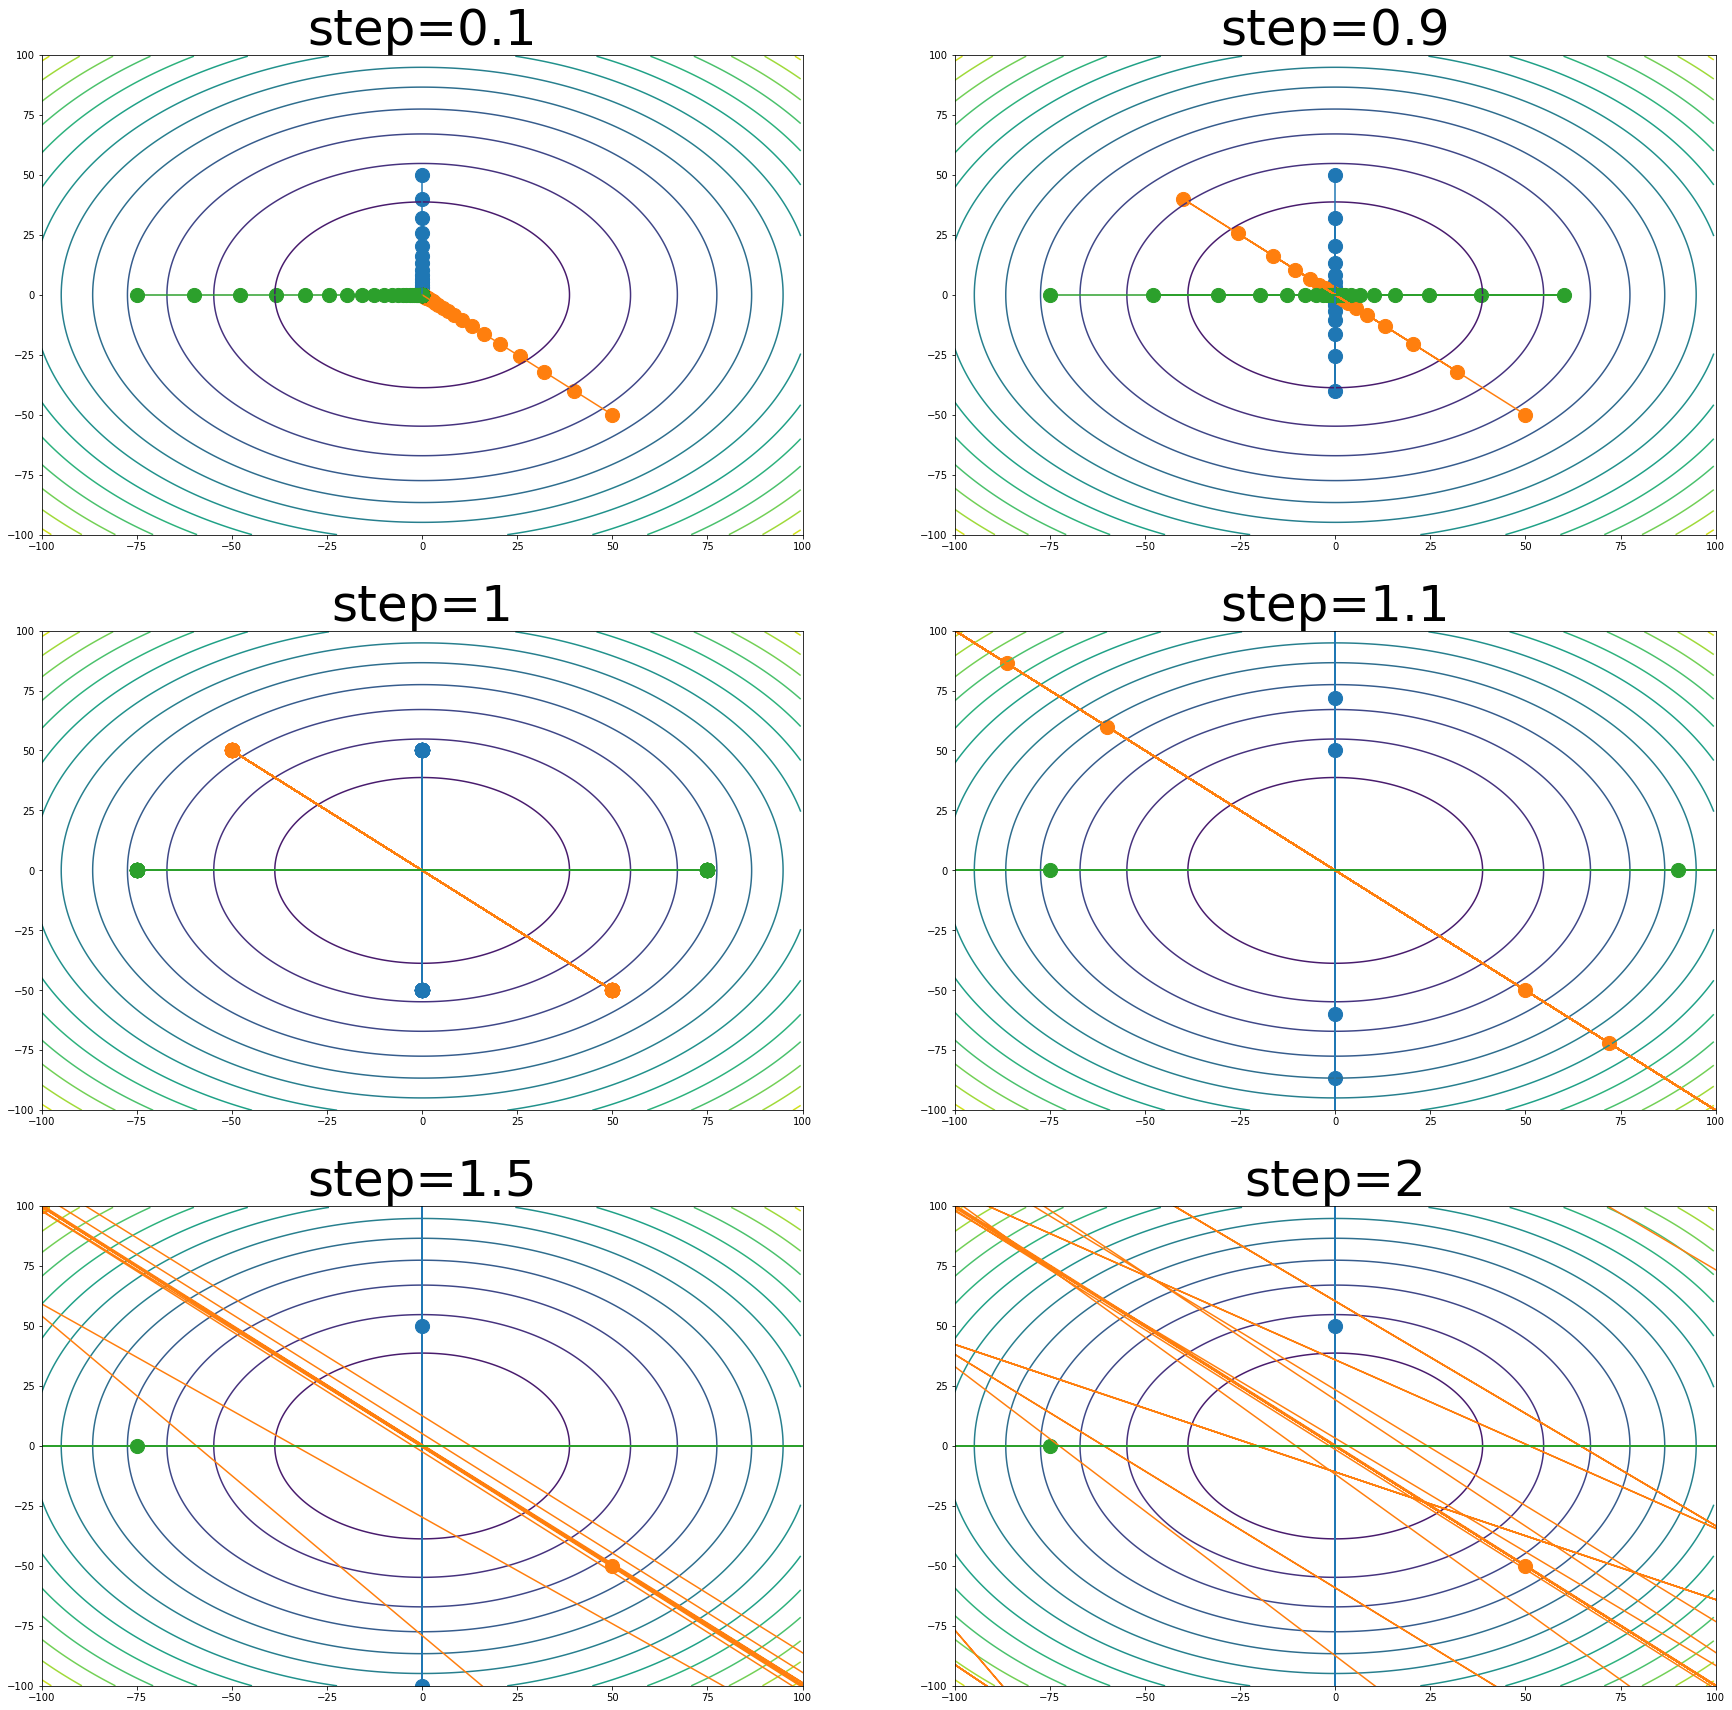

In [77]:
%matplotlib inline

# function to analyze
X = np.arange(-100,100,0.5)
Y = np.arange(-100,100,0.5)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# vector of steps to use
steps = [0.1, .9, 1, 1.1, 1.5, 2]

# loop for computing and plotting paths
plt.figure(figsize=(30,30))
for i, stepi in enumerate(steps):
    descents = []
    descents.append(grad_desc(grad_fun1,np.array([0,50]), alpha=stepi))
    descents.append(grad_desc(grad_fun1,np.array([50,-50]), alpha=stepi))
    descents.append(grad_desc(grad_fun1,np.array([-75,0]), alpha=stepi))
    
    subpl = '32' + str(i+1)  
    plt.subplot(subpl)
    plt.title("step=" + str(stepi), fontsize = 50)
    plt.axis([-100,100,-100,100]) #have to put this right before a given plot for it to work
    plt.contour(X, Y, Z, 15)
    plt.scatter(*zip(*descents[0]),s=200), plt.scatter(*zip(*descents[1]),s=200), plt.scatter(*zip(*descents[2]),s=200)
    plt.plot(*zip(*descents[0])), plt.plot(*zip(*descents[1])), plt.plot(*zip(*descents[2]))

plt.show()



We observe in the figures above (where different colours represent the path from the three different starting points) that the method does converge to the analytically-known minimun (0,0) for $\alpha^k<1$ (although the order of the points is not obvious from the plots, we have trivially verified such is the case from the list "paths", where we record the paths for every step size and from every initial point).
\
For $\alpha^k>=1$, however, we already see in the gradient descent formula that, given the specific gradient of our function, the algorithm cannot ever converge. Indeed, as soon as $\alpha^k=1$, the algorithm will just take the opposite of the initial point in the direction of the gradient, constantly shifting between $x^0$ and $-x^0$, and if $\alpha^k>1$ each inversion will take us ever further away from the minimum (as can be seen from the plots, and we have verified in "paths").\
From the above discussion, we confirm that for (and only for) $\alpha^k<1$ the algorithm converges to the minimum within a given precision, and that the more iterations we perform, the closer we get to such a point, because even if a new point surpasses it, it will invariably be nearer to it than its predecessor. 

### A more complex function

Let's plot the new function to get an idea of what we're looking for:

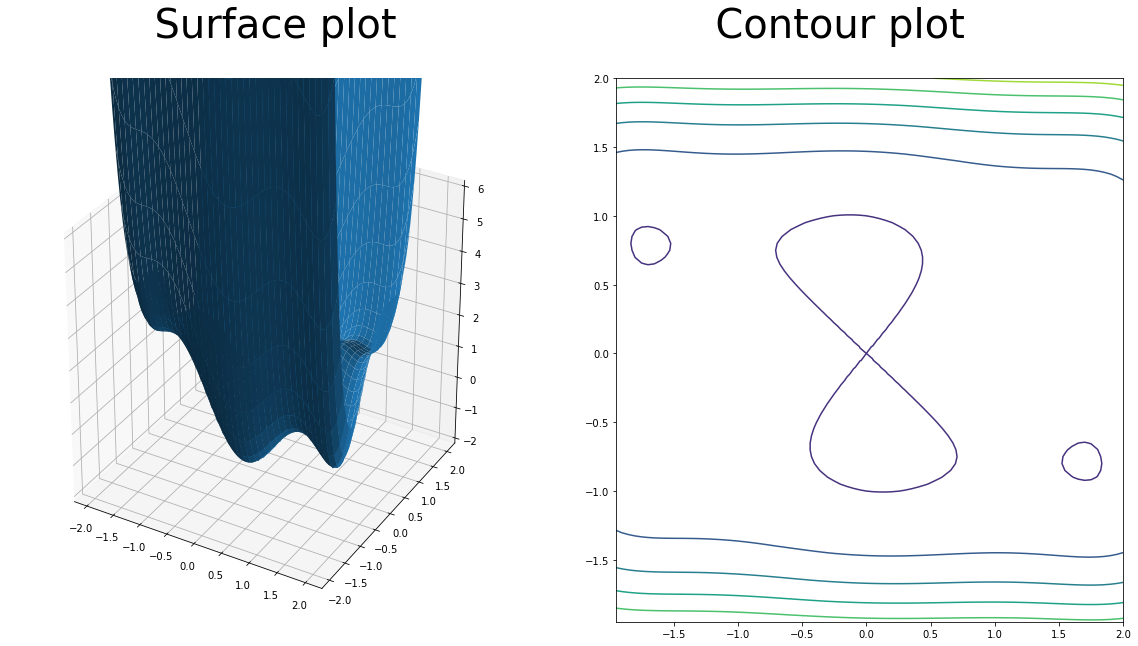

In [31]:
# function to analyze
X = np.arange(2, -2, -0.05)
Y = np.arange(2, -2, -0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2*(4-2.1*X**2 + 1/3*X**4) + X*Y + Y**2*(-4 + 4*Y**2) 

# graph
fig = plt.figure(figsize = (20,10))
fig.suptitle('  Surface plot                         Contour plot', fontsize=40)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_zlim3d(-2,6) #-> dont know if this helps
ax1.plot_surface(X,Y,Z, edgecolor='none', vmin=-1,vmax=10)
ax2 = fig.add_subplot(1, 2, 2)
ax2 = plt.contour(X, Y, Z, 5, cmap ='viridis')
plt.show()

It looks like we have 4 different local minima. Let's see how the gradient descent method fares with this. First, we define the gradient of this second function:

In [11]:
def grad_fun2(point):
    x1 = point[0]
    x2 = point[1]
    gradx1 = 2*x1*(x1**4 - 4.2*x1**2 + 4) + x2
    gradx2 = 8*x2*(2*x2**2 - 1) + x1
    return np.array([gradx1, gradx2])

And now we can proceed as in the previous exercise. Our parameters are: 

Number of iterations: 100.\
Steps $\alpha^k$: 0.01 and 0.1. \
Starting points $x^0$: (-2, 1), (0, -1), (-0.5, 0.5) and (1.5, -0.5).

For x0= [-2, 1] and step= 0.1 , convergence reached after 30 iterations.
xconv= [-0.08984206266792727, 0.7126559719800784]
For x0= [0, -1] and step= 0.1 , convergence reached after 29 iterations.
xconv= [0.08984207293929998, -0.7126558826592386]
For x0= [-0.5, 0.5] and step= 0.1 , convergence reached after 26 iterations.
xconv= [-0.08984207804430445, 0.7126558382655254]
For x0= [-2, 1] and step= 0.01 , convergence reached after 61 iterations.
xconv= [-1.7036071549970375, 0.796083706686716]
For x0= [1.5, -0.5] and step= 0.01 , convergence reached after 68 iterations.
xconv= [1.7036062270224788, -0.7960834209860761]


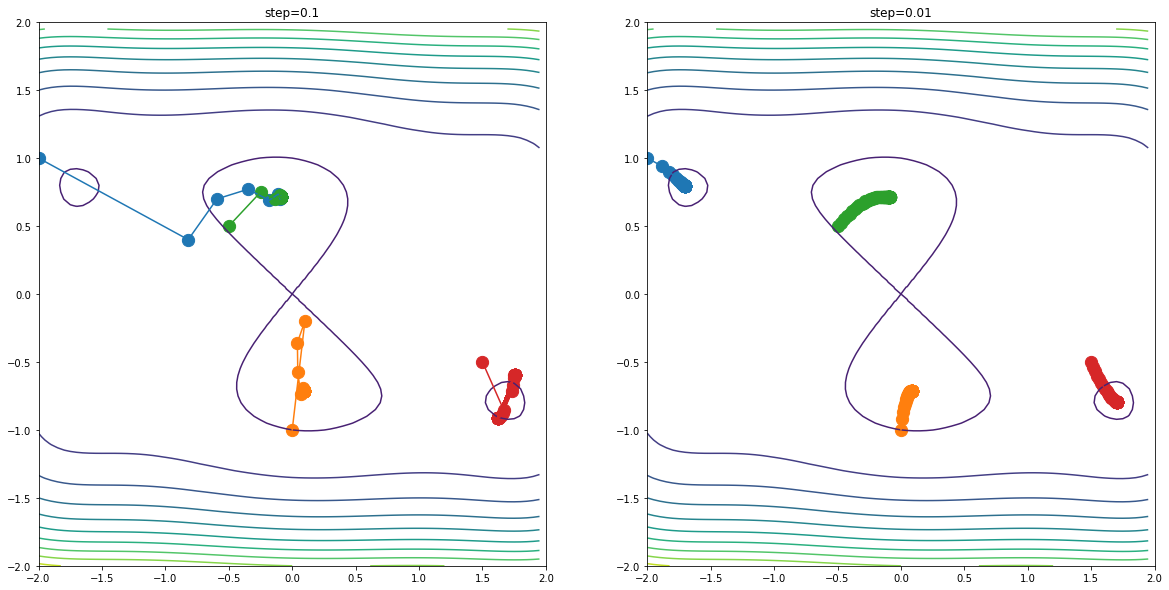

In [84]:
%matplotlib inline

# function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2*(4-2.1*X**2 + 1/3*X**4) + X*Y + Y**2*(-4 + 4*Y**2) 


# vector of steps to use
steps = [0.1, 0.01]

# list to record all the paths
paths2 = []

# loop for computing and plotting paths
plt.figure(figsize=(20, 10))
for i, stepi in enumerate(steps):
    descents = []
    descents.append(grad_desc(grad_fun2,np.array([-2,1]), alpha=stepi))
    descents.append(grad_desc(grad_fun2,np.array([0,-1]), alpha=stepi))
    descents.append(grad_desc(grad_fun2,np.array([-0.5,0.5]), alpha=stepi))
    descents.append(grad_desc(grad_fun2,np.array([1.5,-0.5]), alpha=stepi))
    paths2.append(descents)
    
    subpl = "1" + str(len(steps)) + str(i+1)  
    plt.subplot(subpl)
    plt.title("step=" + str(stepi))
    plt.axis([-2,2,-2,2]) # have to put this right before a given plot for it to work
    plt.contour(X, Y, Z, 10)

    plt.scatter(*zip(*descents[0]),s=150), plt.scatter(*zip(*descents[1]),s=150)
    plt.scatter(*zip(*descents[2]),s=150), plt.scatter(*zip(*descents[3]),s=150)
    plt.plot(*zip(*descents[0])), plt.plot(*zip(*descents[1]))
    plt.plot(*zip(*descents[2])), plt.plot(*zip(*descents[3]))
    
plt.show()



As predicted in the assignment, the minimum found depends on the initial point (as well as on the step size). For step sizes such as $\alpha^k = 0.1$, the behaviour is less predictable and less visible (because 0.1 is only one order of magnitude below the scale of the region populated by the minima, hence allowing for abrupt changes in position), but for small enough ones (such as 0.01) we see that the algorithm approaches the nearest minimum. \
Developing on the above comments on step size, we see that the smaller step size algorithm is slower (100 iterations is not enough for convergence in some cases), but it is also more steady: for x0= (1.5, -0.5), for instance, convergence is reached only with the smaller step size, the other descent bumping around but never reaching the minimum in the established number of iterations. In general, the optimal step size seems to depend on the distance from the minimum and its scale, which points to the importance of an adaptive step size to optimise performance (as shown below).

Now let us redefine the gradient descent function to implement the back-tracking algorithm for adjusting the step (i.e. if proposed $x^{k+1}$ does not yield a lower value of $f$ than $x^k$, halve the step $\alpha^k$ and recompute $x^{k+1}$). The default step is $\alpha^k = 1$.

**We should discuss convergence to global vs local minima**

In [3]:
def grad_desc_improved(fun, grad, x0):
    x = []
    x.append(x0.tolist())
    xk = x0
    i = 0
    while np.linalg.norm(grad(xk)) >= 10**-5:
        alpha = 1
        i += 1
        xkplus1 = xk - alpha*grad(xk)
        while fun(xkplus1)>=fun(xk):
            alpha = alpha/2
            xkplus1 = xk - alpha*grad(xk)
        xk = xkplus1  
        x.append(xk.tolist())
    print ("For x0=", x0.tolist(),", convergence reached after", 
           i, "iterations, with alpha =", alpha)
    #can remove the alpha here, right?
    print ("xconv=", xk.tolist())
    return x

def complicated_fun(point):
    x1 = point[0]
    x2 = point[1]
    f = x1**2*(4-2.1*x1**2 + 1/3*x1**4) + x1*x2 + x2**2*(-4 + 4*x2**2) 
    return f

For x0= [-2, 1] , convergence reached after 13 iterations, with alpha = 0.0625
xconv= [-0.0898425944261536, 0.7126567193801897]
For x0= [0, -1] , convergence reached after 9 iterations, with alpha = 0.0625
xconv= [0.0898419404491034, -0.7126561068997621]
For x0= [-0.5, 0.5] , convergence reached after 9 iterations, with alpha = 0.0625
xconv= [-0.08984230653820173, 0.7126565178057791]
For x0= [1.5, -0.5] , convergence reached after 16 iterations, with alpha = 0.0625
xconv= [1.7036067791780067, -0.7960833373436957]


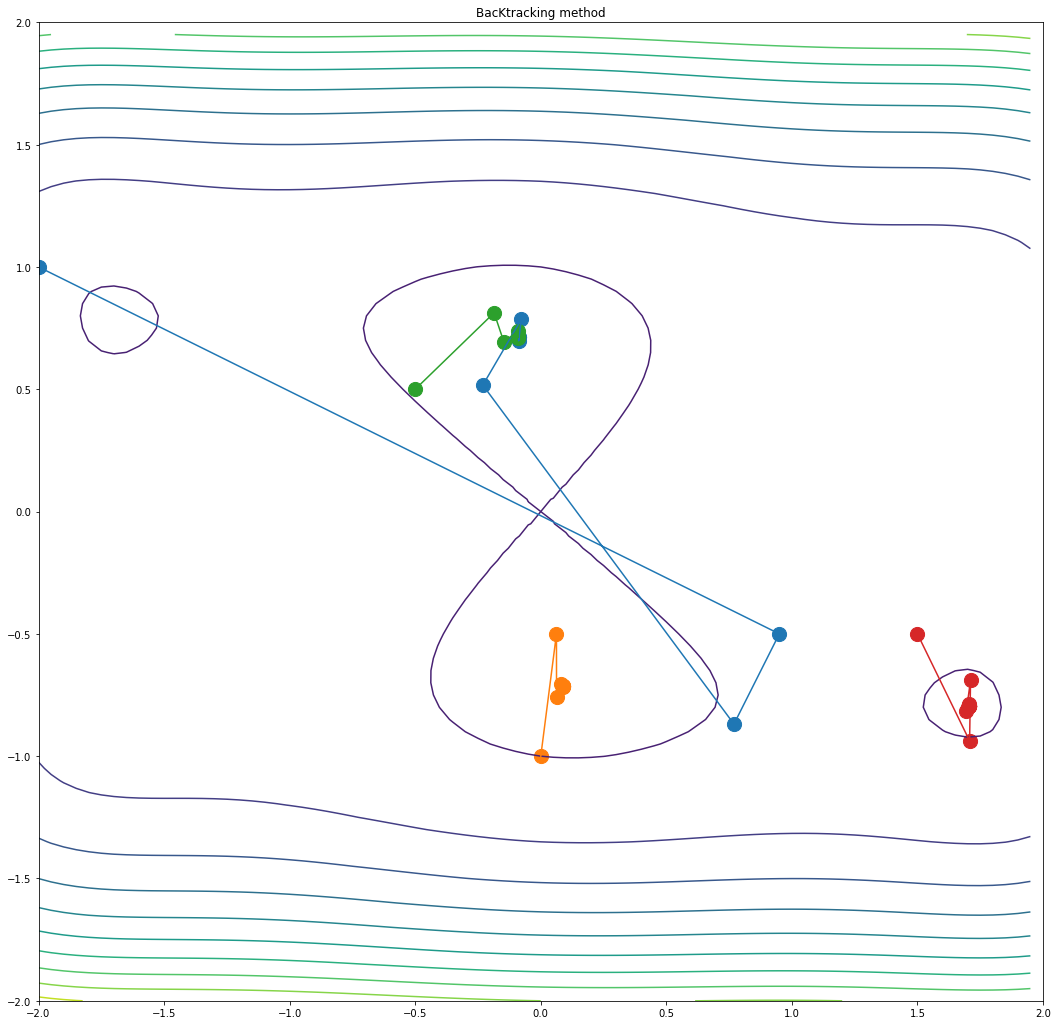

In [85]:
%matplotlib inline

# function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2*(4-2.1*X**2 + 1/3*X**4) + X*Y + Y**2*(-4 + 4*Y**2) 


# vector of initial points
x0a = np.array([-2,1])
x0b = np.array([0,-1])
x0c = np.array([-0.5,0.5])
x0d = np.array([1.5,-0.5])
x0s = [x0a, x0b, x0c, x0d]

# loop for computing and plotting paths
plt.figure(figsize=(18, 18))
plt.title("BacKtracking method")
plt.axis([-2,2,-2,2]) #have to put this right before a given plot for it to work
plt.contour(X, Y, Z, 10)

# list to record all the paths (BT for BackTracking)
pathsBT = []

for x0 in x0s:
        descent = grad_desc_improved(complicated_fun, grad_fun2,x0)
        pathsBT.append(descent)
        plt.scatter(*zip(*descent),s=200)   
        plt.plot(*zip(*descent))   

plt.show()

Nice! Although the actual minimum found still depends on the initial position and the step size, the implementation of the back-tracking algorithm reduces visibly the number of iterations necessary for convergence (to $<20$) with respect to the constant-step case.

### The Rosenbrock function

Let us first draw the contour of the function, including its gradient information.

In [14]:
def rosen_fun(point, a=1, b=100):
    x1 = point[0]
    x2 = point[1]
    f = (a - x1)**2 + b*(x2-x1**2)**2
    return f

def grad_rosen_fun(point, a=1, b=100):
    x1 = point[0]
    x2 = point[1]
    gradx1 = -2*(a - x1) - 4*b*x1*(x2 - x1**2)
    gradx2 = 2*b*(x2 - x1**2)
    return np.array([gradx1, gradx2])


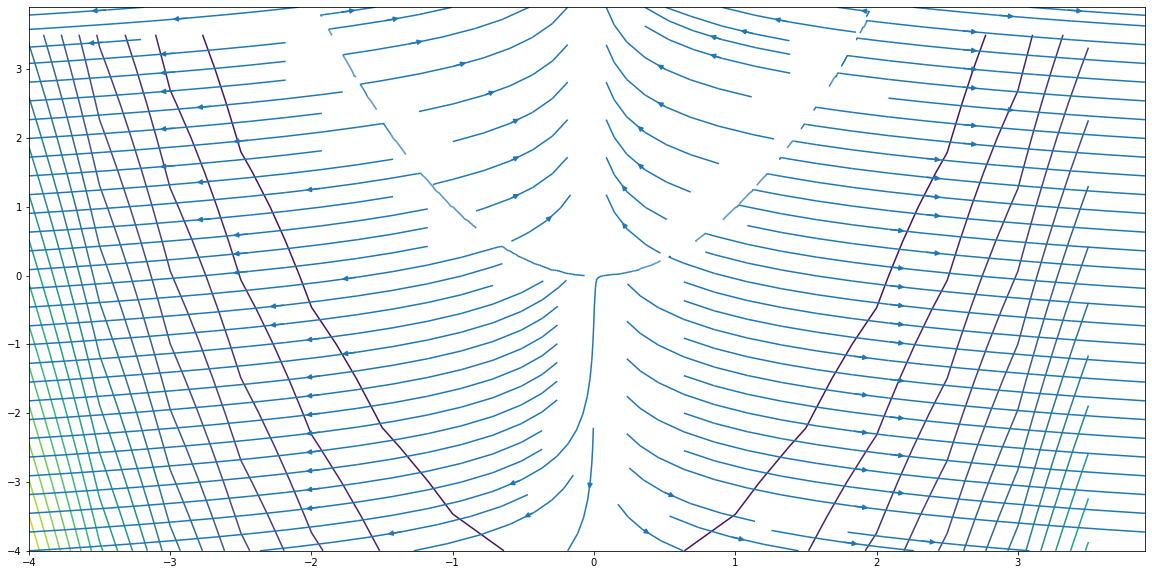

In [87]:
%matplotlib inline

# function to analyze
a, b = [1, 100]
xrange = [-4, 4]
yrange = [-4, 4]
step = 0.5
X = np.arange(xrange[0], xrange[1], step)
Y = np.arange(yrange[0], yrange[1], step)
X, Y = np.meshgrid(X, Y)
Z = (a - X)**2 + b*(Y-X**2)**2


# contour plot en 2D
plt.figure(figsize=(20,10))
plt.contour(X, Y, Z, 20)

# compute gradient 
step_grad = 0.1
X = np.arange(xrange[0], xrange[1], step_grad)
Y = np.arange(yrange[0], yrange[1], step_grad)
X, Y = np.meshgrid(X, Y)
gradx = -2*(a - X) - 4*b*X*(Y - X**2)
grady = 2*b*(Y - X**2)

plt.streamplot(X, Y, gradx, grady)

plt.show()

The gradient stream allows us to see the narrow, parabolic-shaped valley mentioned in the assignment. However, it does not seem obvious from the plot that the minimum of the function is indeed (1,1), something that we know just from looking at the expression of the function. Let us see if we can find the minimum.

For x0= [-3.5, -3.5] , convergence reached after 10772 iterations, with alpha = 0.001953125
xconv= [0.9999921641080141, 0.9999843126645688]
For x0= [3, 0] , convergence reached after 14543 iterations, with alpha = 0.001953125
xconv= [1.0000078210243453, 1.0000156577525177]


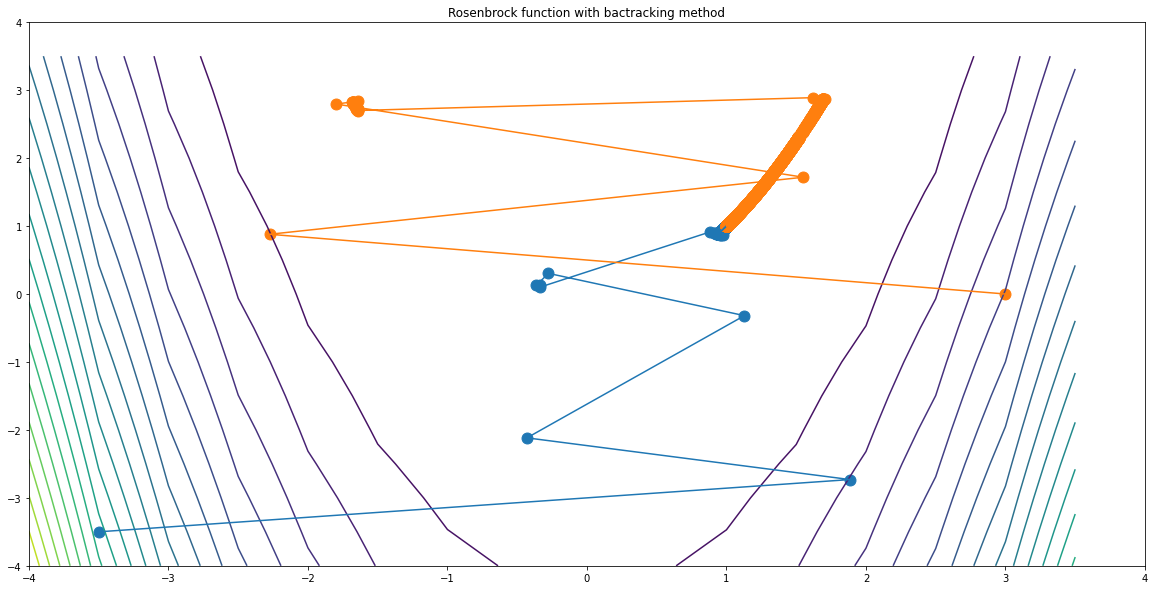

In [91]:
%matplotlib inline

# function to analyze
a, b = [1, 100]
xrange = [-4, 4]
yrange = [-4, 4]
step = 0.5
X = np.arange(xrange[0], xrange[1], step)
Y = np.arange(yrange[0], yrange[1], step)
X, Y = np.meshgrid(X, Y)
Z = (a - X)**2 + b*(Y-X**2)**2


# vector of initial points
x0a = np.array([-3.5,-3.5])
x0b = np.array([3,0])
x0s = [x0a, x0b]

# loop for computing and plotting paths
plt.figure(figsize=(20, 10))
plt.title("Rosenbrock function with bactracking method")
plt.axis([xrange[0],xrange[1],yrange[0],yrange[1]]) #have to put this right before a given plot for it to work
plt.contour(X, Y, Z, 20)

# list to record all the paths (R for Rosenbrock)
pathsR = []

for x0 in x0s:
        descent = grad_desc_improved(rosen_fun, grad_rosen_fun,x0)
        pathsBT.append(descent)
        plt.scatter(*zip(*descent),s=120)   
        plt.plot(*zip(*descent))

plt.show()



Even with the backtracking method, it appears it is very costly to find the minimum of the Rosenbrock function by gradient descent, although at least the algorithm eventually does converge to the analytic minimum. 

## Newton descent method

### A simple quadratic function

Again, we define the gradient of the function suggested, $f(x) = 100x_1^2 + x_2^2$:

$$ \nabla f(x) = (200x_1 , 2x_2)$$

In [2]:
def grad_fun4(point):
    return np.array([200*point[0],2*point[1]])

def fun4(point):
    return 100*point[0]**2 + point[1]**2

At first, we are asked to minimize the previous function using gradient descent while computing $\alpha^k$ using the backtracking algorithm from section 1.2.

For x0= [-2, 1] , convergence reached after 558 iterations, with alpha = 0.0078125
xconv= [-3.0150941236560196e-08, 3.974303619731344e-06]
For x0= [0, -1] , convergence reached after 1 iterations, with alpha = 0.5
xconv= [0.0, 0.0]
For x0= [-0.5, 0.5] , convergence reached after 530 iterations, with alpha = 0.0078125
xconv= [-3.343564067892048e-08, 3.682751312532087e-06]
For x0= [1.5, -0.5] , convergence reached after 532 iterations, with alpha = 0.0078125
xconv= [3.1737737050694076e-08, -3.5685644432226234e-06]


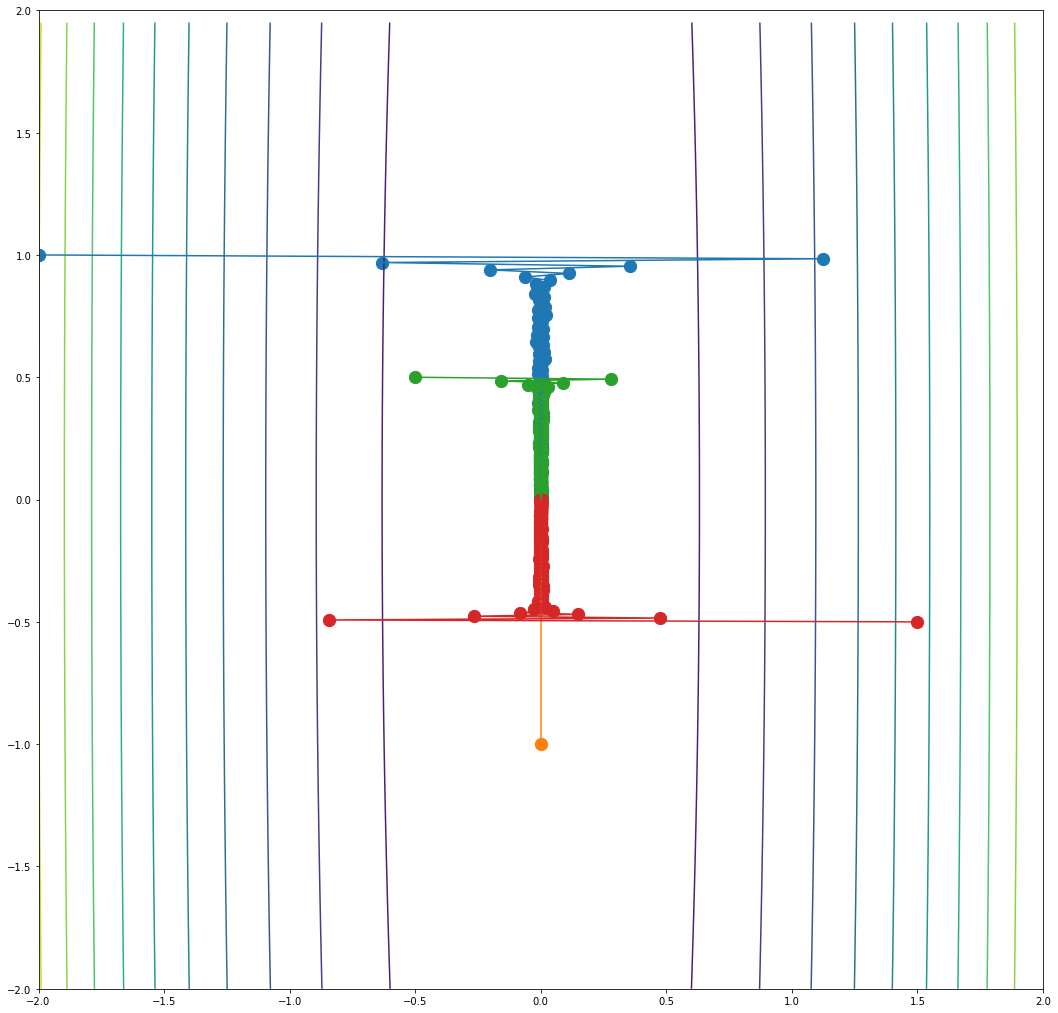

In [6]:
%matplotlib inline

# function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = 100*X**2 + Y**2


# vector of initial points
x0a = np.array([-2,1])
x0b = np.array([0,-1])
x0c = np.array([-0.5,0.5])
x0d = np.array([1.5,-0.5])
x0s = [x0a, x0b, x0c, x0d]

# loop for computing and plotting paths
plt.figure(figsize=(18, 18))
plt.axis([-2,2,-2,2]) #have to put this right before a given plot for it to work
plt.contour(X, Y, Z, 10)

# list to record all the paths (BT for BackTracking)
pathsBT = []

for x0 in x0s:
        descent = grad_desc_improved(fun4, grad_fun4,x0)
        pathsBT.append(descent)
        plt.scatter(*zip(*descent),s=150)  
        plt.plot(*zip(*descent))   
plt.show()

This is interesting: we see that, even though this function is very similar to the one used in 1.1 and the initial points are much closer to the minimum (which is also (0,0)) than in that exercise, convergence takes generally more than 500 iterations. 
\
From the gradient descent formula, we see that this is because of the different scales of the gradient in the x and y directions: for any point with a non-zero gradient in x, any $\alpha^k$ will yield a much bigger step in x than in y, so the backtracking algorithm picks the $\alpha^k$ that is just barely small enough for the gradient descent not to diverge in the x direction (as it did in 1.1 for $\alpha > 1$ and for any direction).
\
Hence, the algorithm first almost exclusively moves on the x axis, and once x is close enough to 0 for the y-component of the gradient to balance its x-component, it can move on the vertical axis and reach the minimum. Since the point $x^0=(0,-1)$ already starts at $x=0$, it does not have this problem and it reaches (0,0) in only one step (for $\alpha^k=1/2$).
\
Therefore, we see that the gradient descent method is not very robust: as soon as there is an asymmetry in the scale of the dimensions, and even if the function is still convex, it becomes very inefficient. 

We are now going to perform the descent with the algorithm $x^{k+1} = x^k + \alpha^k d^k$, that introduces:  $$ \nabla^2 f(x^k)d^k = -{\nabla f(x^k)},$$ the descent direction. In order to do so, we define the function: 

In [7]:
def newton_desc(fun, grad, hess, x0):
    x = []
    x.append(x0.tolist())
    xk = x0
    i = 0
    while np.linalg.norm(grad(xk)) >= 10**-5:
        alpha = 1
        i += 1
        d_k = np.linalg.solve(hess(xk), -grad(xk).transpose())
        xkplus1 = xk + alpha*d_k
        while fun(xkplus1)>=fun(xk):
            alpha = alpha/2       
            xkplus1 = xk + alpha*d_k
        xk = xkplus1  
        x.append(xk.tolist())
    print ("For x0=", x0.tolist(),", convergence reached after", 
           i, "iterations, with alpha =", alpha)
    print ("xconv=", xk.tolist())
    return x

def hess_fun4(point):
    return np.array([[200,0],[0,2]])

And iterate:

For x0= [-2, 1] , convergence reached after 1 iterations, with alpha = 1
xconv= [0.0, 0.0]
For x0= [0, -1] , convergence reached after 1 iterations, with alpha = 1
xconv= [0.0, 0.0]
For x0= [-0.5, 0.5] , convergence reached after 1 iterations, with alpha = 1
xconv= [0.0, 0.0]
For x0= [1.5, -0.5] , convergence reached after 1 iterations, with alpha = 1
xconv= [0.0, 0.0]


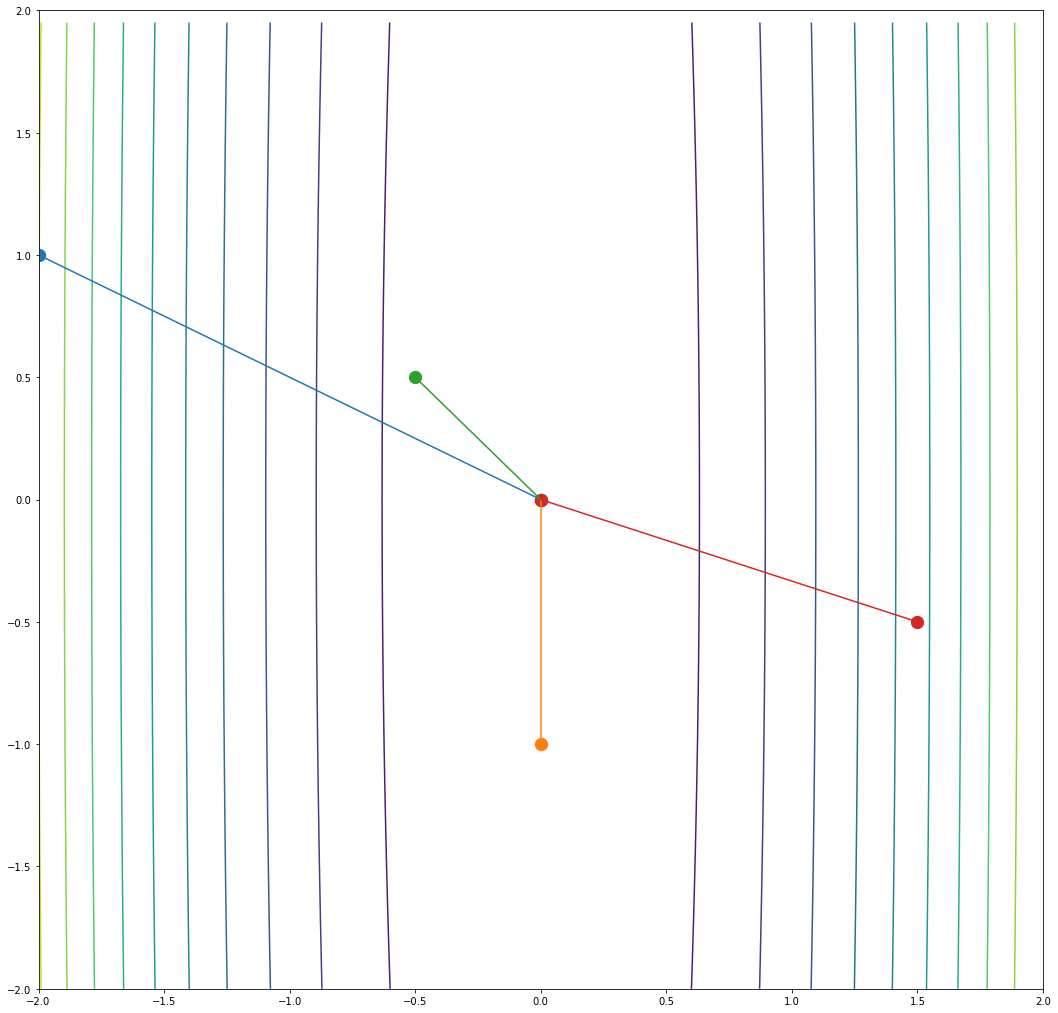

In [8]:
%matplotlib inline

# function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = 100*X**2 + Y**2


# vector of initial points
x0a = np.array([-2,1])
x0b = np.array([0,-1])
x0c = np.array([-0.5,0.5])
x0d = np.array([1.5,-0.5])
x0s = [x0a, x0b, x0c, x0d]

# loop for computing and plotting paths
plt.figure(figsize=(18, 18))
plt.axis([-2,2,-2,2]) #have to put this right before a given plot for it to work
plt.contour(X, Y, Z, 10)

# list to record all the paths (BT for BackTracking)
pathsBT = []

for x0 in x0s:
        descent = newton_desc(fun4, grad_fun4, hess_fun4, x0)
        pathsBT.append(descent)
        plt.scatter(*zip(*descent),s=150) 
        plt.plot(*zip(*descent))   


plt.show()

As it can be seen, the number of iterations needed to reach the minimum are significantly smaller than the number required by the gradient descent.

### A more complex function

We redefine the Newton method to use the gradient descent in case the Hessian is not positive definite:


In [9]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

def newton_desc_improved(fun, grad, hess, x0):
    xg = []
    xn = []
    xn.append(x0.tolist())
    xg.append(x0.tolist())
    xk = x0
    i = 0
    while np.linalg.norm(grad(xk)) >= 10**-5:
        alpha = 1
        i += 1
        if is_pos_def(hess(xk)):
            d_k = np.linalg.solve(hess(xk), -grad(xk).transpose())
            xkplus1 = xk + alpha*d_k
        else:
            xkplus1 = xk - alpha*grad(xk)
        while fun(xkplus1)>=fun(xk):
            alpha = alpha/2       
            if is_pos_def(hess(xk)):
                d_k = np.linalg.solve(hess(xk), -grad(xk).transpose())
                xkplus1 = xk + alpha*d_k
            else:
                xkplus1 = xk - alpha*grad(xk) 
        if is_pos_def(hess(xk)):
            xk = xkplus1 
            xn.append(xk.tolist())
        else:
            xk = xkplus1 
            xg.append(xk.tolist())
    print ("For x0=", x0.tolist(),", convergence reached after", 
           i, "iterations, with alpha =", alpha)
    print ("xconv=", xk.tolist())
    return xg,xn

And plot both methods to check the path they follow:

For x0= [-2, 1] , convergence reached after 5 iterations, with alpha = 1
xconv= [-1.703606715419442, 0.7960835686932453]
For x0= [0, -1] , convergence reached after 4 iterations, with alpha = 1
xconv= [0.08984204526449233, -0.7126566581455768]
For x0= [-0.5, 0.5] , convergence reached after 3 iterations, with alpha = 1
xconv= [-0.08984202470407167, 0.7126567356448503]
For x0= [1.5, -0.5] , convergence reached after 5 iterations, with alpha = 1
xconv= [1.7036067640094579, -0.7960835709196604]
For x0= [1.5, 0.9] , convergence reached after 5 iterations, with alpha = 1
xconv= [1.6071048263564118, 0.5686514452536573]


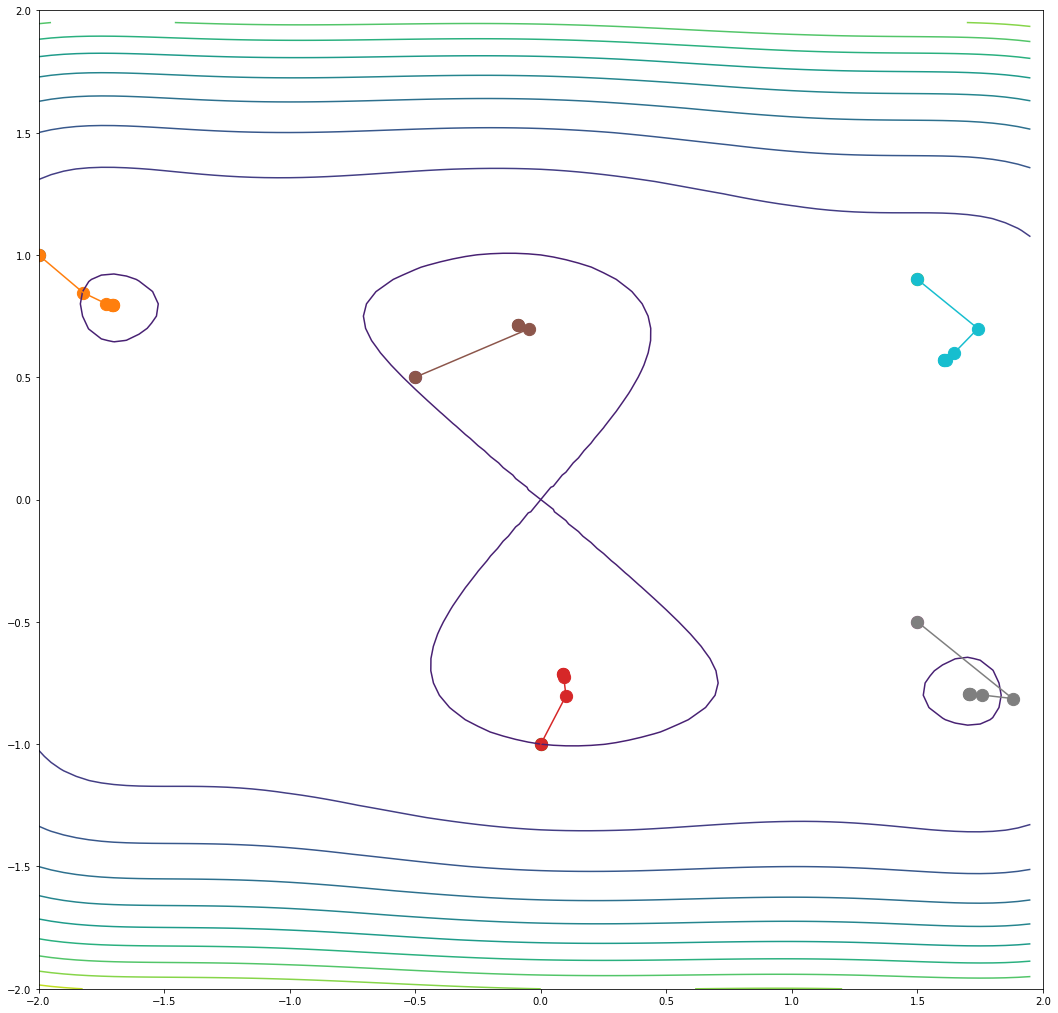

In [13]:
# %matplotlib inline

def hess_fun2(point):
    hessx1x1 = 10*point[0]**4 -6*4.2*point[0]**2 + 8
    hessx1x2 = 1
    hessx2x1 = 1
    hessx2x2 = 48*point[1]**2 - 8
    return np.array([[hessx1x1,hessx1x2],[hessx2x1,hessx2x2]])

# function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2*(4-2.1*X**2 + 1/3*X**4) + X*Y + Y**2*(-4 + 4*Y**2) 


# vector of initial points
x0a = np.array([-2,1])
x0b = np.array([0,-1])
x0c = np.array([-0.5,0.5])
x0d = np.array([1.5,-0.5])
x0e = np.array([1.5, 0.9])
x0s = [x0a, x0b, x0c, x0d, x0e]

# loop for computing and plotting paths
plt.figure(figsize=(18, 18))
plt.axis([-2,2,-2,2]) #have to put this right before a given plot for it to work
plt.contour(X, Y, Z, 10)

for x0 in x0s:
        descentg,descentn = newton_desc_improved(complicated_fun, grad_fun2, hess_fun2, x0)
        plt.scatter(*zip(*descentg),s=150),plt.scatter(*zip(*descentn),s=150)  
        plt.plot(*zip(*descentg)),plt.plot(*zip(*descentn))
plt.show()

### The Rosenbrock function

Calculating gradient descent paths...
For x0= [-3.5, -3.5] , convergence reached after 10772 iterations, with alpha = 0.001953125
xconv= [0.9999921641080141, 0.9999843126645688]
For x0= [3, 0] , convergence reached after 14543 iterations, with alpha = 0.001953125
xconv= [1.0000078210243453, 1.0000156577525177]


Calculating Newton method paths...


NameError: name 'grad_rosen_funp' is not defined

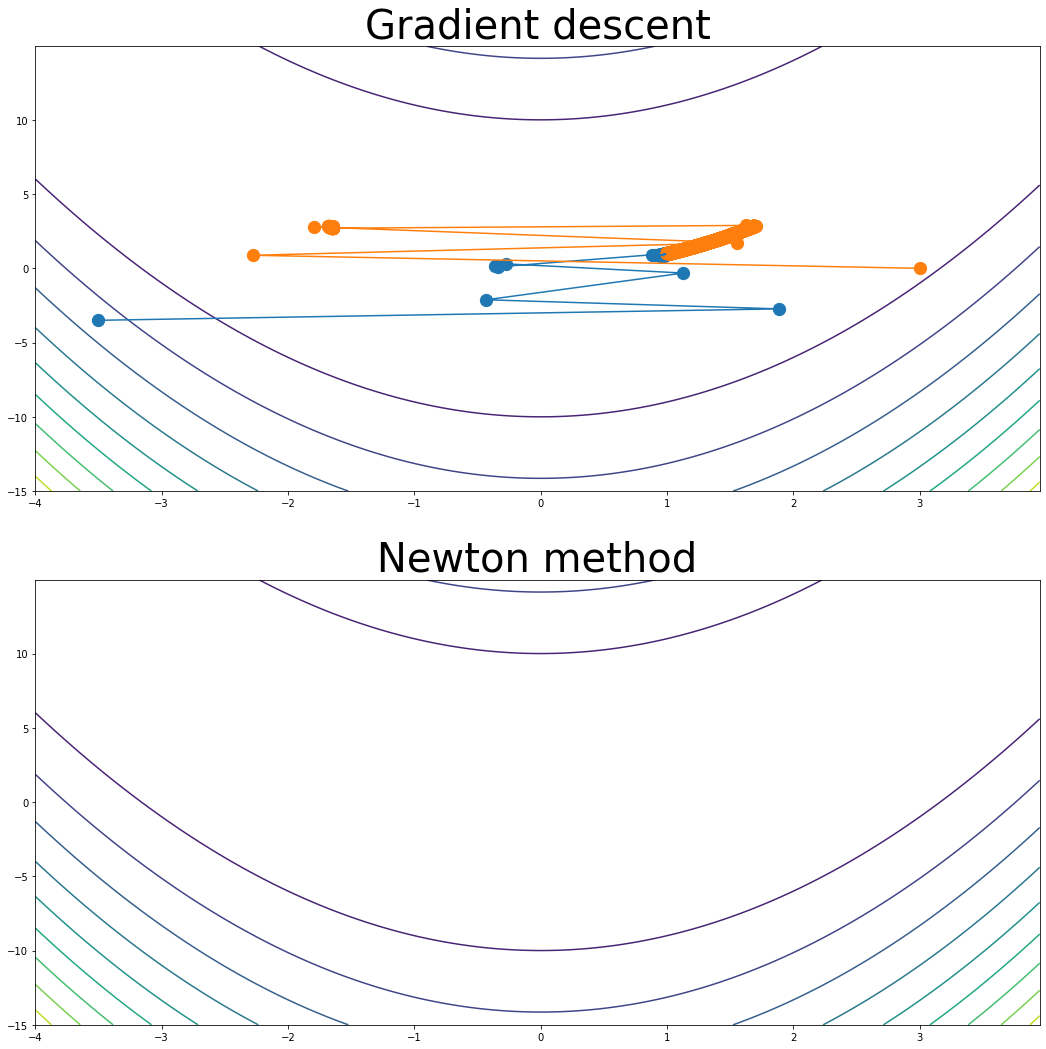

In [16]:
%matplotlib inline

def hess_rosen_fun(point):
    hessx1x1 = +2-4*b*point[1]+12*b*point[0]**2
    hessx1x2 = -4*b*point[0]
    hessx2x1 = -4*b*point[0]
    hessx2x2 = +2*b
    return np.array([[hessx1x1,hessx1x2],[hessx2x1,hessx2x2]])

# function to analyze
a =1
b = 100
X = np.arange(-4, 4, 0.05)
Y = np.arange(-15, 15, 0.05)
X, Y = np.meshgrid(X, Y)
Z = (a - X)**2 + b*(Y-X**2)**2


# vector of initial points
x0a = np.array([-3.5,-3.5])
x0b = np.array([3,0])
x0s = [x0a, x0b]

# loop for computing and plotting paths
plt.figure(figsize=(18, 18))

plt.subplot(2,1,1)
plt.title('Gradient descent', fontsize=40)
plt.contour(X, Y, Z, 10)
print('Calculating gradient descent paths...')
for x0 in x0s:
        descent = grad_desc_improved(rosen_fun, grad_rosen_fun, x0)
        plt.scatter(*zip(*descent),s=150) 
        plt.plot(*zip(*descent))
        
print('\n')

plt.subplot(2,1,2)
plt.title('Newton method', fontsize=40)
plt.contour(X, Y, Z, 10)
print('Calculating Newton method paths...')
for x0 in x0s:
        descentg,descentn = newton_desc_improved(rosen_fun, grad_rosen_funp, hess_rosen_fun, x0)
        plt.scatter(*zip(*descentg),s=150),plt.scatter(*zip(*descentn),s=150)  
        plt.plot(*zip(*descentg)),  plt.plot(*zip(*descentn)) 
plt.show()

The printed text and plots show how much easier it is to reach the minimum of the Rosenbrock function making use of the Newton method optimized for when the Hessian matrix is not a definite positive matrix. 